# Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Reading data

In [2]:
df = pd.read_csv('fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

### Data Cleaning

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

# check whether the data containing null values or not.
print('Sum of Missing Values:', df.isnull().sum().sum())

Sum of Missing Values: 0


As you can see that all the columns are already clean.

### Data Visualization

1. Fradulent Trasactions

In [5]:
d = df["is_fraud"].value_counts().reset_index()
d.columns = ['is_fraud', 'count']

# Create the pie chart with updated parameters
fig = px.pie(d, values="count", names=['No', 'Yes'], hole=0.40, opacity=0.9,
             labels={"is_fraud": "Fraud", "count": "Number of Samples"})
fig.update_layout(title=dict(text="Pie Chart of Fraudulent Transactions"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

2.   Gender Analysis of Fraudulant Trasactions

Text(0, 0.5, 'Count')

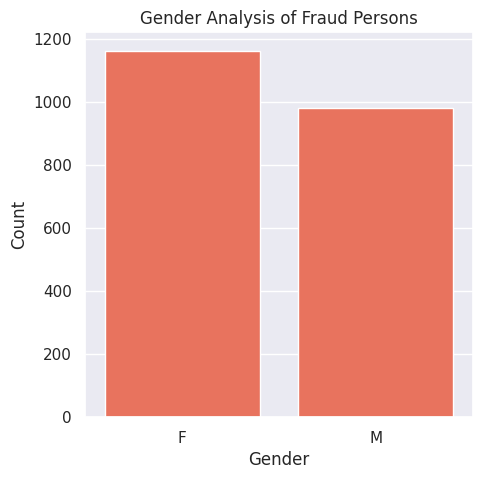

In [12]:
df_fraud = df[df['is_fraud'] == 1]

plt.figure(figsize=(5, 5))
sns.set()
plt.title('Gender Analysis of Fraud Persons')
sns.countplot(x=df_fraud['gender'], color='tomato')
plt.xlabel('Gender')
plt.ylabel('Count')

1.   Category Analysis of Fraud persons




Text(0, 0.5, 'Trasaction Category')

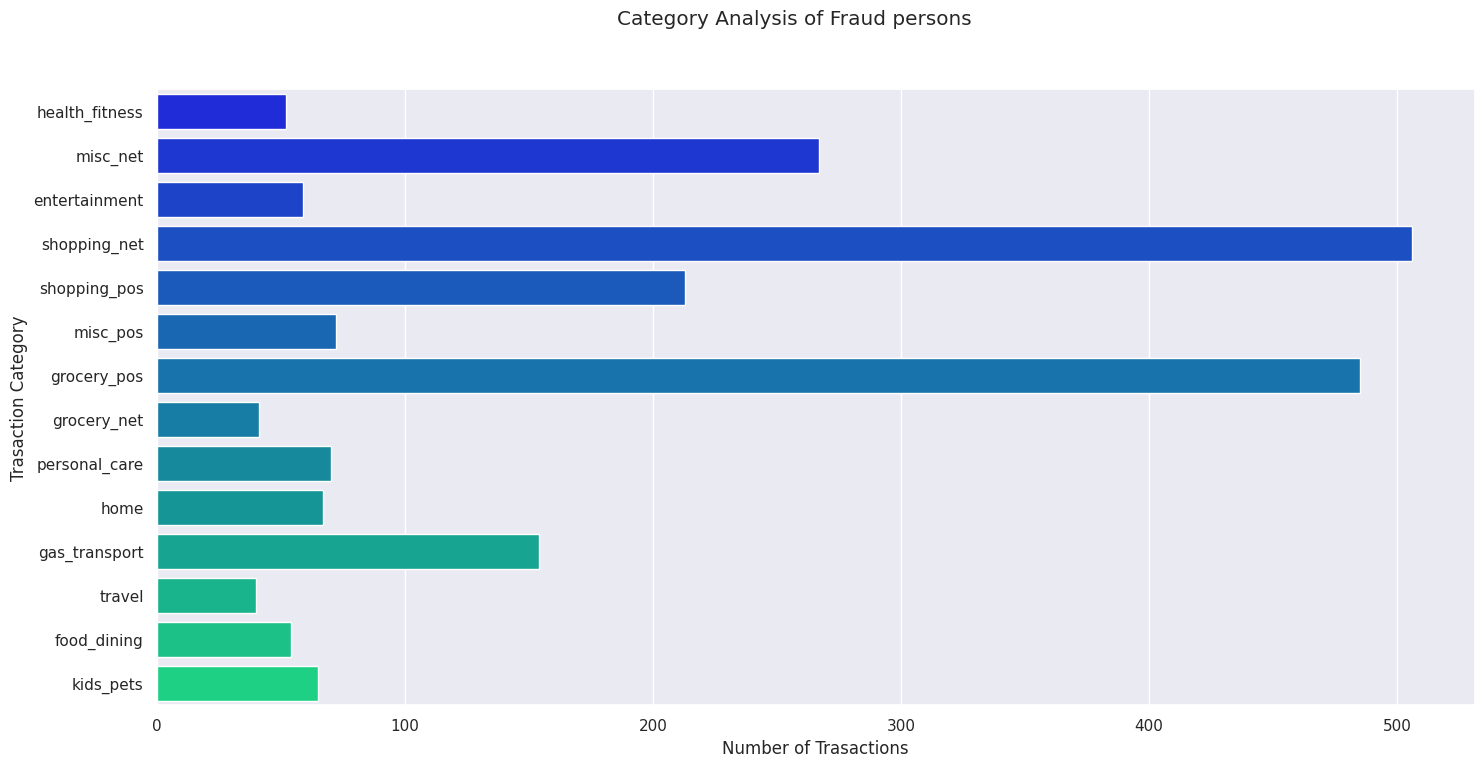

In [21]:
plt.figure(figsize=(17,8))
sns.set()
plt.suptitle('Category Analysis of Fraud persons')
sns.countplot(df_fraud['category'], palette='winter')
plt.xlabel('Number of Trasactions')
plt.ylabel('Trasaction Category')

1. Distribution of Fruadulent Transaction Amount (K)



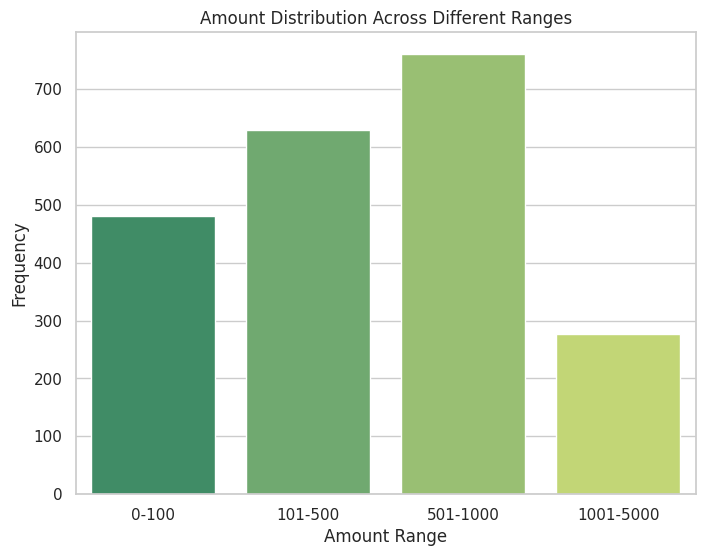

In [32]:
amounts = df_fraud['amt']

bins = [0, 100, 500, 1000, 5000]
labels = ['0-100', '101-500', '501-1000', '1001-5000']

df_fraud['amount_range'] = pd.cut(amounts, bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='amount_range', data=df_fraud, palette='summer')
plt.title('Amount Distribution Across Different Ranges')
plt.xlabel('Amount Range')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

### **Feature Selection**

In [70]:
features = df[['category', 'amt', 'gender', 'city', 'state', 'job']]

# Target Selection
target = df['is_fraud']

In [71]:
# Check whether the data is imbalanced or not.
target.value_counts()

,count
is_fraud,
0,553574
1,2145


It is clearly observed that the data is highly imbalanced. There are 1289169 records belonging to one class and only 7506 records are belonging to other class. In oprder to balance the data, we will use downsampling method.

### Downsampling

In [75]:
from imblearn.under_sampling import RandomUnderSampler
# Define the undersampling method
undersampler = RandomUnderSampler()

# Undersample the data
x_sampled, y_sampled = undersampler.fit_resample(features, target)

# Check the balanced data
y_sampled.value_counts()

,count
is_fraud,
0,2145
1,2145


It can clrealy seen that the data has been balanced now.

### Data Encoding

In [85]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your original DataFrame
categorical_columns = x_sampled.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_values = encoder.fit_transform(x_sampled[categorical_columns])

# Create a DataFrame for the encoded values
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_values, columns=encoded_columns, index=x_sampled.index)

# Drop original categorical columns from df and concatenate the encoded columns
df_features = x_sampled.drop(columns=categorical_columns)
df_features = pd.concat([df_features, encoded_df], axis=1)

# Display the resulting DataFrame with transformed numerical columns
df_features.head()


,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,...,job_Tree surgeon,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
211955,63.04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15760,6.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198534,2.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66154,39.22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253986,8.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you can see that the data is encoded into numerical format.

In [89]:
# Train-Test Splition
x_train, x_test, y_train, y_test = train_test_split(df_features, y_sampled,
                                                    test_size = 0.2,
                                                    random_state=42)

### Model Training

In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
acc  = round(100 * accuracy_score(y_test, y_predict))
print(f'Accuracy of Model on Test data:{acc}%')

Accuracy of Model on Test data:94%


#### Accuracy

#### Confusion matrix


Confusion-Matrix:
 [[428  24]
 [ 27 379]]


Total records given: 858

Actual Fraud person: 452
True predictions of Fraud persons: 428
False predictions of Fraud persons: 24
Accuracy: 95 %

Actual Honest persons: 406
True predictions of Honest persons: 379
False predictions of Honest persons: 27
Accuracy: 93 %





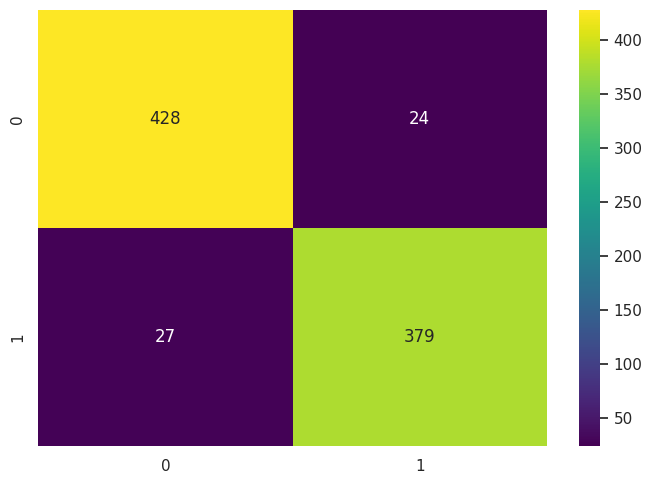

In [93]:
cm = confusion_matrix(y_test, y_predict)
print('\nConfusion-Matrix:\n',cm)
print('\n\nTotal records given:',len(x_test))
actual_fp = cm[0][0] + cm[0][1]
actual_hp = cm[1][0] + cm[1][1]
tp = cm[0][0]
tn =  cm[1][1]
print('\nActual Fraud person:',actual_fp)
print('True predictions of Fraud persons:',tp)
print('False predictions of Fraud persons:',cm[0][1])
print('Accuracy:',round(tp/actual_fp * 100), '%')
print('\nActual Honest persons:',actual_hp)
print('True predictions of Honest persons:',tn)
print('False predictions of Honest persons:',cm[1][0])
print('Accuracy:',round(tn/actual_hp * 100), '%')
print('\n\n')
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True, fmt='g',cmap='viridis')
plt.tight_layout()
plt.show()

#### Classification Report

In [94]:
print('\nClassification report :\n',classification_report(y_test, y_predict))


Classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       452
           1       0.94      0.93      0.94       406

    accuracy                           0.94       858
   macro avg       0.94      0.94      0.94       858
weighted avg       0.94      0.94      0.94       858



### Saving the Model

In [95]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('encoder_model.pkl', 'wb') as file2:
    pickle.dump(encoder, file2)

